In [592]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, cauchy 

LOWER = 4050
UPPER = 4100
TEST=4100

In [593]:
# Read data
df = pd.read_csv('data/apr-10-spx.csv')

In [594]:
# Compute parameters

df["returns"]=(df["SPX"]-df["SPX"].shift(1))/(df["SPX"].shift(1))
df=df.drop(0)

params = cauchy.fit(df["returns"])
print(params)
x0,gamma=params
print(cauchy.cdf((UPPER-TEST)/TEST, x0*27513, gamma*27513**(2/3)) - cauchy.cdf((LOWER-TEST)/TEST, x0*27513, gamma*27513**(2/3)))
df["x0"]=x0*(27513-df["Index"])
df["gamma"]=gamma*(27513-df["Index"])**(2/3)
df["mean"]=np.mean(df["returns"])*(27513-df["Index"])
df["std"]=np.std(df["returns"])*(27513-df["Index"])**(1/2)




(-1.5982372951839352e-07, 5.113397830966874e-06)
0.5692990235708992


In [595]:
# Compute probability
df["probability"] = cauchy.cdf((UPPER-df["SPX"])/df["SPX"],df["x0"], df["gamma"]) - cauchy.cdf((LOWER-df["SPX"])/df["SPX"],df["x0"], df["gamma"])
df["probability_norm"] = norm.cdf((UPPER-df["SPX"])/df["SPX"], df["mean"], df["std"]) - norm.cdf((LOWER-df["SPX"])/df["SPX"],  df["mean"], df["std"])
print(df["probability_norm"])
print(df["probability"])

1        0.239929
2        0.238470
3        0.235548
4        0.232398
5        0.228552
           ...   
27508    0.000000
27509    0.000000
27510    0.000000
27511    0.000000
27512    0.000000
Name: probability_norm, Length: 27512, dtype: float64
1        0.529828
2        0.530359
3        0.531399
4        0.532515
5        0.533868
           ...   
27508    0.002123
27509    0.001824
27510    0.001476
27511    0.001126
27512    0.000658
Name: probability, Length: 27512, dtype: float64


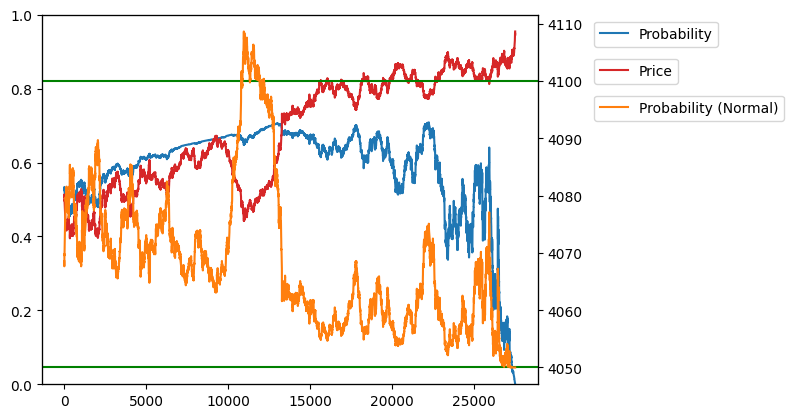

In [596]:
# Plot probability and price
fig, ax1 = plt.subplots()
ax1.plot(df["Index"], df["probability"], color="tab:blue")

ax2 = ax1.twinx()
ax2.plot(df["Index"], df["SPX"], color="tab:red")
ax2.axhline(y=4050, color='g', linestyle='-')
ax2.axhline(y=4100, color='g', linestyle='-')

ax3 = ax1.twinx()
ax3.plot(df["Index"], df["probability_norm"], color="tab:orange")
# Plot ax3 on same scale as ax1
ax1.set_ylim(bottom=0, top=1)
# Don't plot ax3 y axis values
ax3.set_yticks([])

# Plot legend
ax1.legend(["Probability"], bbox_to_anchor=(1.10, 1), loc="upper left")
ax2.legend(["Price"], bbox_to_anchor=(1.10, 0.9), loc="upper left")
ax3.legend(["Probability (Normal)"], bbox_to_anchor=(1.10, 0.8), loc="upper left")